# Fit the DDM on individual data

In [1]:
import pandas as pd

from rlssm.model.models_DDM import DDModel
from rlssm.utility.load_data import load_example_dataset

## Import the data

In [2]:
data = load_example_dataset(hierarchical_levels = 1)

data.head()

,participant,block_label,trial_block,f_cor,f_inc,cor_option,inc_option,times_seen,rt,accuracy
0,21,1,1,39,38,2,1,1,1.193522,0
1,21,1,2,55,38,4,2,1,1.344920,0
2,21,1,3,52,55,4,3,1,1.032342,1
3,21,1,4,64,49,4,3,2,1.201309,0
4,21,1,5,48,49,4,3,3,1.163588,1


## Initialize the model

In [3]:
model = DDModel(hierarchical_levels = 1)

14:02:05 - cmdstanpy - INFO - compiling stan file /home/andrei/PycharmProjects/rlssm/rlssm/stan_models/DDM/DDM.stan to exe file /home/andrei/PycharmProjects/rlssm/rlssm/stan_models/DDM/DDM
14:02:14 - cmdstanpy - INFO - compiled model executable: /home/andrei/PycharmProjects/rlssm/rlssm/stan_models/DDM/DDM
14:02:14 - cmdstanpy - WARNING - Stan compiler has produced 6 warnings:
14:02:14 - cmdstanpy - WARNING - 
--- Translating Stan model to C++ code ---
bin/stanc  --o=/home/andrei/PycharmProjects/rlssm/rlssm/stan_models/DDM/DDM.hpp /home/andrei/PycharmProjects/rlssm/rlssm/stan_models/DDM/DDM.stan
Warning in '/home/andrei/PycharmProjects/rlssm/rlssm/stan_models/DDM/DDM.stan', line 4, column 1: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in '/home/andrei/PycharmProjects/rlssm/rlssm/

## Fit

In [4]:
# sampling parameters
n_warmup = 500
n_sampling = 500
n_chains = 2
n_thin = 1

In [5]:
model_fit = model.fit(
    data,
    thin = n_thin,
    iter_warmup=n_warmup,
    iter_sampling=n_sampling,
    chains = n_chains,
    pointwise_waic=False)

14:02:14 - cmdstanpy - INFO - CmdStan start processing


Fitting the model using the priors:
drift_priors {'mu': 1, 'sd': 5}
threshold_priors {'mu': 0, 'sd': 5}
ndt_priors {'mu': 0, 'sd': 5}


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

14:02:17 - cmdstanpy - INFO - CmdStan done processing.
14:02:17 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: wiener_lpdf: Boundary separation[1] is inf, but must be positive finite! (in '/home/andrei/PycharmProjects/rlssm/rlssm/stan_models/DDM/DDM.stan', line 43, column 1 to column 59)
	Exception: wiener_lpdf: Boundary separation[1] is inf, but must be positive finite! (in '/home/andrei/PycharmProjects/rlssm/rlssm/stan_models/DDM/DDM.stan', line 43, column 1 to column 59)
	Exception: wiener_lpdf: Boundary separation[1] is inf, but must be positive finite! (in '/home/andrei/PycharmProjects/rlssm/rlssm/stan_models/DDM/DDM.stan', line 43, column 1 to column 59)
	Exception: wiener_lpdf: Random variable  = 1.19352, but must be greater than nondecision time = 31.0012 (in '/home/andrei/PycharmProjects/rlssm/rlssm/stan_models/DDM/DDM.stan', line 43, column 1 to column 59)
	Exception: wiener_lpdf: Random variable  = 1.19352, but must be greater than nondecision time = 6.4


Checks MCMC diagnostics:
n_eff / iter looks reasonable for all parameters
0 of 1000 iterations saturated the maximum tree depth of 10 (0.0%)
E-BFMI indicated no pathological behavior
0.0 of 1000 iterations ended with a divergence (0.0%)


### get Rhat

In [6]:
model_fit.rhat

,rhat,variable
name,,
lp__,1.009090,lp__
drift,1.007060,drift
threshold,1.009290,threshold
ndt,1.006180,ndt
drift_ll[1],1.007060,drift_ll[1]
...,...,...
log_lik[235],0.999372,log_lik[235]
log_lik[236],0.998818,log_lik[236]
log_lik[237],0.999297,log_lik[237]


### get wAIC

In [7]:
model_fit.waic

{'lppd': -177.63528790213186,
 'p_waic': 2.981915854117017,
 'waic': 361.23440751249774,
 'waic_se': 39.89792609117187}

## Posteriors

In [8]:
model_fit.samples.describe()

,transf_drift,transf_threshold,transf_ndt
count,1000.000000,1000.000000,1000.000000
mean,1.279713,2.176140,0.739246
std,0.088394,0.104516,0.018846
min,1.045470,1.841480,0.668498
25%,1.214558,2.104870,0.727898
50%,1.282315,2.163760,0.740895
75%,1.340863,2.241875,0.753184
max,1.580960,2.549410,0.793210


In [9]:
import seaborn as sns
sns.set(context = "talk", 
        style = "white", 
        palette = "husl",
        rc={'figure.figsize':(15, 8)})

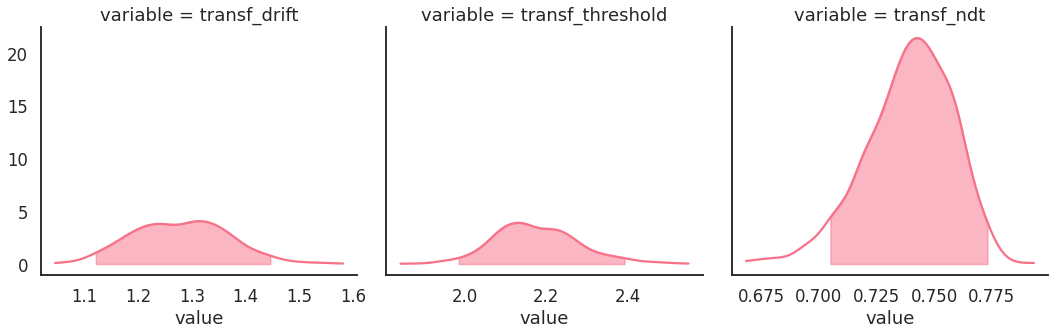

In [10]:
model_fit.plot_posteriors(height=5, show_intervals="HDI", alpha_intervals=.05);

## Posterior predictives

### Ungrouped

In [11]:
pp = model_fit.get_posterior_predictives_df(n_posterior_predictives=100)
pp

variable        rt                                                    \
trial          1         2         3         4         5         6     
sample                                                                 
1         1.013650  1.358650  0.916650  1.224650  0.909650  1.403650   
2         1.172797  1.901797  1.592797  1.119797  2.186797  0.951797   
3         2.726361  1.061361  1.188361  1.051361  1.023361  0.985361   
4         1.663760  1.158760  0.912760  1.801760  0.994760  1.521760   
5         2.369806  1.696806  2.284806  2.449806  1.807806  1.010806   
...            ...       ...       ...       ...       ...       ...   
96        1.703044  1.300044  1.212044  0.931044  1.899044  2.993044   
97        3.551194  1.593194  1.343194  1.247194  1.128194  1.205194   
98        1.601100  1.725100  1.843100  1.968100  0.955100  2.612100   
99        1.015083  1.204083  1.493083  2.282083  1.105083  1.138083   
100       0.936740  1.263740  1.320740  1.718740  4.062740  1.088740   

variable                                          ... accuracy                 \
trial          7         8         9         10   ...      230  231  232  233   
sample                                            ...                           
1         0.847650  1.396650  1.040650  2.112650  ...      1.0  1.0  1.0  1.0   
2         1.711797  1.412797  1.067797  1.686797  ...      1.0  1.0  1.0  1.0   
3         1.057361  1.163361  1.399361  2.128361  ...      1.0  1.0  1.0  1.0   
4         1.087760  2.080760  1.599760  1.752760  ...      1.0  1.0  1.0  1.0   
5         1.646806  1.431806  0.959806  1.500806  ...      1.0  1.0  1.0  1.0   
...            ...       ...       ...       ...  ...      ...  ...  ...  ...   
96        1.099044  2.512044  1.458044  1.942044  ...      1.0  1.0  1.0  1.0   
97        1.009194  1.667194  1.173194  1.195194  ...      1.0  1.0  1.0  1.0   
98        1.424100  0.884100  1.514100  2.198100  ...      1.0  1.0  1.0  1.0   
99        1.514083  0.996083  1.052083  1.132083  ...      1.0  1.0  1.0  1.0   
100       1.252740  0.882740  2.999740  1.030740  ...      1.0  1.0  1.0  1.0   

variable                                
trial     234  235  236  237  238  239  
sample                                  
1         1.0  1.0  1.0  0.0  0.0  1.0  
2         1.0  1.0  1.0  1.0  1.0  1.0  
3         1.0  1.0  1.0  1.0  1.0  1.0  
4         1.0  1.0  1.0  1.0  1.0  1.0  
5         1.0  1.0  1.0  1.0  1.0  1.0  
...       ...  ...  ...  ...  ...  ...  
96        1.0  1.0  1.0  1.0  1.0  1.0  
97        1.0  1.0  1.0  0.0  0.0  1.0  
98        1.0  1.0  1.0  1.0  1.0  1.0  
99        1.0  1.0  0.0  1.0  1.0  1.0  
100       1.0  1.0  1.0  1.0  1.0  1.0  

[100 rows x 478 columns]

In [12]:
pp_summary = model_fit.get_posterior_predictives_summary(n_posterior_predictives=100)
pp_summary

,mean_accuracy,mean_rt,skewness,quant_10_rt_low,quant_30_rt_low,quant_50_rt_low,quant_70_rt_low,quant_90_rt_low,quant_10_rt_up,quant_30_rt_up,quant_50_rt_up,quant_70_rt_up,quant_90_rt_up
sample,,,,,,,,,,,,,
1,0.962343,1.542826,1.620274,0.919050,1.014650,1.370650,1.614250,1.890250,0.978650,1.184050,1.387150,1.658350,2.367150
2,0.966527,1.570998,2.195012,1.134297,1.356697,1.460297,1.800597,3.388497,0.949797,1.150797,1.329797,1.648797,2.399797
3,0.933054,1.536687,2.004316,1.180361,1.301361,1.467361,1.608861,2.023861,0.966361,1.166961,1.332361,1.602561,2.334161
4,0.987448,1.452923,1.428620,1.117360,1.118560,1.119760,1.122560,1.125360,1.009260,1.153760,1.321260,1.587260,2.112760
5,0.979079,1.464153,2.254239,0.925406,1.002406,1.108806,1.171206,1.513206,1.011606,1.176706,1.346806,1.627906,2.064406
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.962343,1.483161,1.862628,1.081644,1.116244,1.341044,1.516844,1.665844,1.007844,1.169644,1.338044,1.570644,2.194344
97,0.937238,1.510060,1.845455,1.017994,1.080394,1.230194,1.501194,2.076794,1.032494,1.188794,1.359194,1.587694,2.246194
98,0.916318,1.522908,1.428744,1.104900,1.221600,1.395600,1.477200,1.770300,1.000100,1.191100,1.417100,1.669100,2.223100


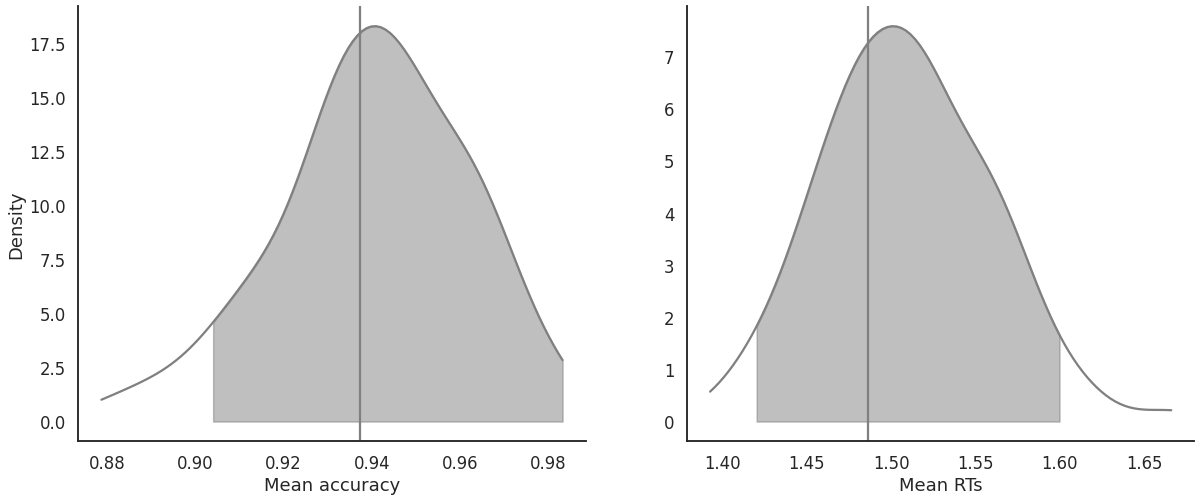

In [13]:
model_fit.plot_mean_posterior_predictives(n_posterior_predictives=100, figsize=(20,8), show_intervals='HDI');

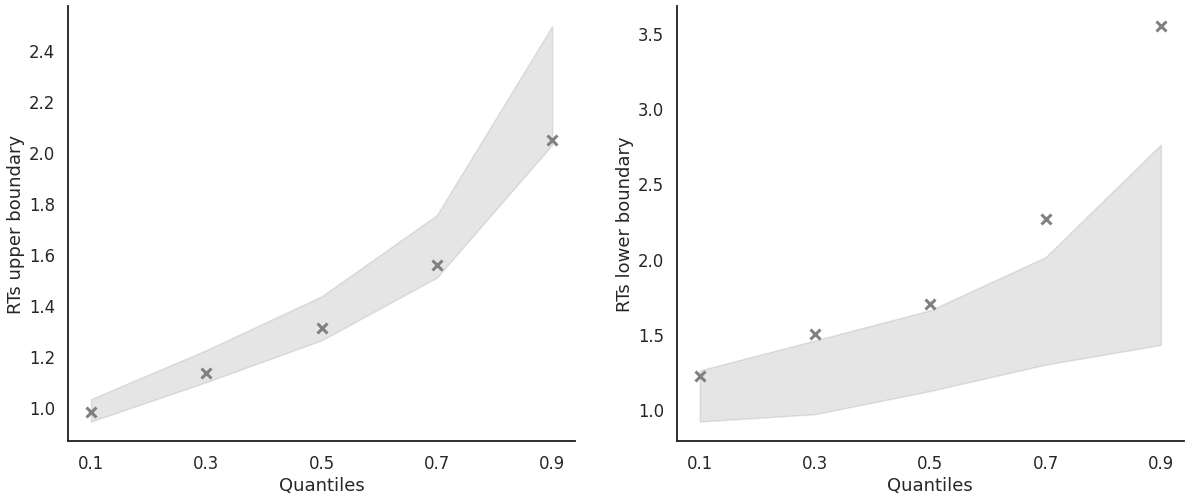

In [14]:
model_fit.plot_quantiles_posterior_predictives(n_posterior_predictives=100, kind='shades');

### Grouped

In [15]:
import numpy as np

In [16]:
# Define new grouping variables, in this case, for the different choice pairs, but any grouping var can do
data['choice_pair'] = 'AB'
data.loc[(data.cor_option == 3) & (data.inc_option == 1), 'choice_pair'] = 'AC'
data.loc[(data.cor_option == 4) & (data.inc_option == 2), 'choice_pair'] = 'BD'
data.loc[(data.cor_option == 4) & (data.inc_option == 3), 'choice_pair'] = 'CD'

data['block_bins'] = pd.cut(data.trial_block, 8, labels=np.arange(1, 9))

In [17]:
model_fit.get_grouped_posterior_predictives_summary(
                grouping_vars=['block_label', 'choice_pair'],
                quantiles=[.3, .5, .7],
                n_posterior_predictives=100)

mean_accuracy   mean_rt  skewness  \
block_label choice_pair sample                                      
1           AB          1            0.894737  1.601597  1.692788   
                        2            0.947368  1.390165  0.700905   
                        3            0.894737  1.562729  1.164779   
                        4            1.000000  1.325813  0.836935   
                        5            1.000000  1.252174  2.513407   
...                                       ...       ...       ...   
3           CD          96           0.900000  1.633494  1.147059   
                        97           1.000000  1.355044  1.789701   
                        98           0.950000  1.457600  0.939381   
                        99           1.000000  1.456883  0.595735   
                        100          1.000000  1.304290  3.397532   

                                quant_30_rt_low  quant_30_rt_up  \
block_label choice_pair sample                                    
1           AB          1              1.635150        1.288450   
                        2              1.137797        1.138797   
                        3              0.979061        1.272161   
                        4                   NaN        1.201960   
                        5                   NaN        1.070006   
...                                         ...             ...   
3           CD          96             1.394544        1.192844   
                        97                  NaN        1.069194   
                        98             1.248100        1.218700   
                        99                  NaN        1.274583   
                        100                 NaN        1.089540   

                                quant_50_rt_low  quant_50_rt_up  \
block_label choice_pair sample                                    
1           AB          1              1.640150        1.508650   
                        2              1.137797        1.295797   
                        3              1.056861        1.434361   
                        4                   NaN        1.268760   
                        5                   NaN        1.176806   
...                                         ...             ...   
3           CD          96             1.505544        1.524544   
                        97                  NaN        1.184694   
                        98             1.248100        1.381100   
                        99                  NaN        1.387583   
                        100                 NaN        1.141740   

                                quant_70_rt_low  quant_70_rt_up  
block_label choice_pair sample                                   
1           AB          1              1.645150        1.757250  
                        2              1.137797        1.556597  
                        3              1.134661        1.810961  
                        4                   NaN        1.394760  
                        5                   NaN        1.342006  
...                                         ...             ...  
3           CD          96             1.616544        1.627044  
                        97                  NaN        1.406194  
                        98             1.248100        1.552300  
                        99                  NaN        1.620083  
                        100                 NaN        1.280140  

[1200 rows x 9 columns]

In [18]:
model_fit.get_grouped_posterior_predictives_summary(
                grouping_vars=['block_bins'],
                quantiles=[.3, .5, .7],
                n_posterior_predictives=100)

mean_accuracy   mean_rt  skewness  quant_30_rt_low  \
block_bins sample                                                       
1          1            0.966667  1.435950  1.311441         1.117650   
           2            0.933333  1.526530  0.873932         1.036297   
           3            0.933333  1.528894  1.454715         1.345861   
           4            1.000000  1.462393  0.408597              NaN   
           5            0.966667  1.435806  1.584210         1.281806   
...                          ...       ...       ...              ...   
8          96           0.931034  1.405975  2.130693         1.204344   
           97           0.931034  1.459815  1.635068         1.091394   
           98           0.965517  1.418169  2.349669         2.019100   
           99           0.931034  1.461152  1.624322         1.269983   
           100          0.896552  1.480878  0.543192         1.260340   

                   quant_30_rt_up  quant_50_rt_low  quant_50_rt_up  \
block_bins sample                                                    
1          1             1.097250         1.117650        1.327650   
           2             1.246897         1.059297        1.419797   
           3             1.203661         1.514861        1.326361   
           4             1.278260              NaN        1.418760   
           5             1.164006         1.281806        1.310806   
...                           ...              ...             ...   
8          96            1.128844         1.264544        1.303044   
           97            1.213194         1.172194        1.331194   
           98            1.162300         2.019100        1.265100   
           99            1.168883         1.290583        1.245083   
           100           1.073240         1.398740        1.398740   

                   quant_70_rt_low  quant_70_rt_up  
block_bins sample                                   
1          1              1.117650        1.436250  
           2              1.082297        1.655197  
           3              1.683861        1.554661  
           4                   NaN        1.640660  
           5              1.281806        1.501806  
...                            ...             ...  
8          96             1.324744        1.406044  
           97             1.252994        1.536194  
           98             2.019100        1.413100  
           99             1.311183        1.524883  
           100            1.453940        1.779740  

[800 rows x 9 columns]

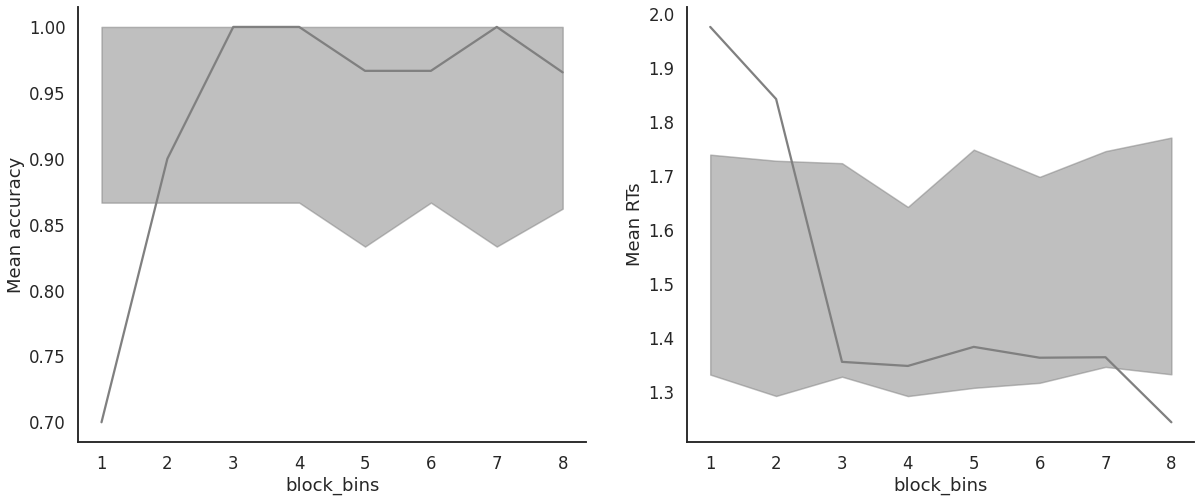

In [19]:
model_fit.plot_mean_grouped_posterior_predictives(grouping_vars=['block_bins'], 
                                                  n_posterior_predictives=100, 
                                                  figsize=(20,8));

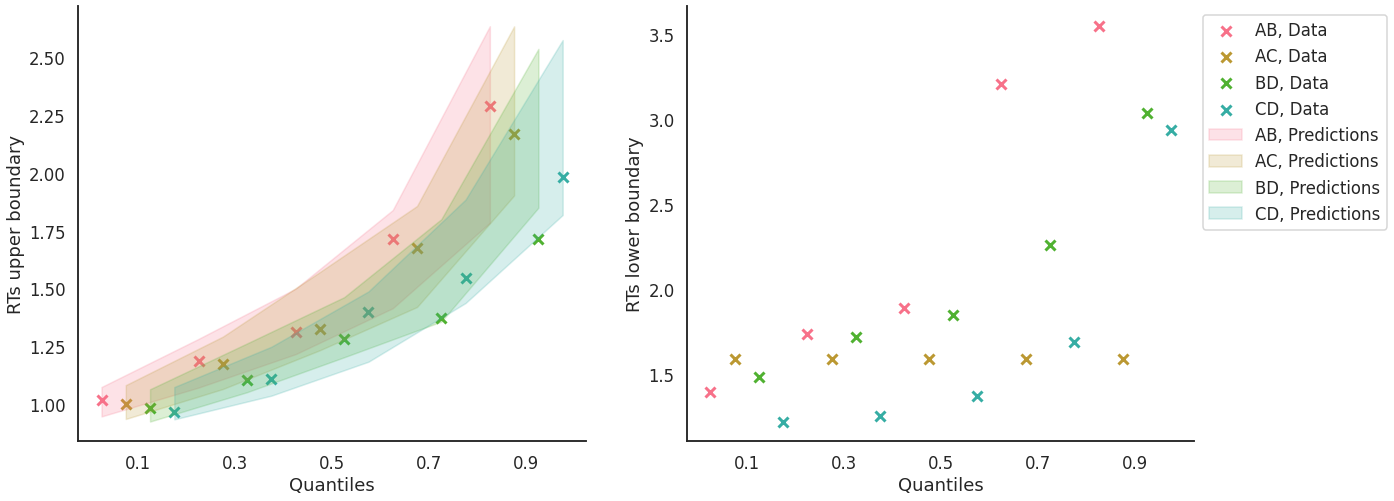

In [20]:
model_fit.plot_quantiles_grouped_posterior_predictives(
    n_posterior_predictives=100,
    grouping_var='choice_pair',
    kind='shades',
    quantiles=[.1, .3, .5, .7, .9]);